## Fit a linear model to some random numbers

This is nice and simple but makes sure that everything is running ok on your machine! Run all the cells and make sure you don't get any errors.

> This is the notebook for the first morning session. I'm using a `{am|pm}{1|2}-name-with-stuff.ipynb` naming scheme to make it easy for people to know what to look for where.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

seaborn.set()
colors = seaborn.palettes.get_color_cycle()

Make some data

In [2]:
# Parameters
alpha, beta, gamma = -0.3, 1.3, 1
epsilon = 0.8
npoints = 30

# Functions
sinc = lambda x: np.sin(np.pi * x) / x
actual = lambda x: alpha + beta * sinc(x) + gamma * x

In [3]:
# Generate data
df = pd.DataFrame()
df['x'] = np.random.uniform(0, 5, size=npoints)
noise = np.random.normal(loc=0, scale=epsilon, size=npoints)
df['y'] = alpha + beta * sinc(df.x) + gamma * df.x + noise

Plot the data

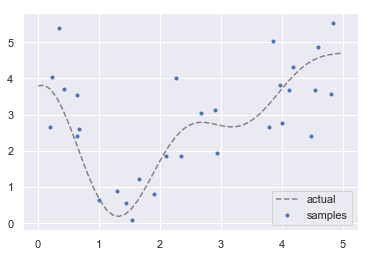

In [4]:
ax = plt.gca()
xs = np.linspace(0.01, 5)
ax.plot(xs, actual(xs), 'k--', alpha=0.5, label='actual')
ax.plot(df.x, df.y, '.', label='samples')
ax.legend()

Fit a regression using ordinary least squares and an 'R-style' function

In [5]:
model = smf.ols('y ~ sinc(x) + x', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     26.93
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           3.71e-07
Time:                        14:32:29   Log-Likelihood:                -37.342
No. Observations:                  30   AIC:                             80.68
Df Residuals:                      27   BIC:                             84.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2926      0.405      0.723      0.476      -0.538       1.123
sinc(x)        1.3031      0.198      6.578      0.000       0.897       1.710
x              0.7992      0.125      6.395      0.000       0.543       1.056
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.216
Skew:                           0.188   Prob(JB):                        0.898
Kurtosis:                       2.822   Cond. No.                         8.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the regression using seaborn

In [6]:
pred = lambda p, x: \
    p['Intercept'] + p['sinc(x)'] * sinc(x) + \
    p['x'] * x
xpred = np.linspace(0.01, 5)
ypred = pred(results.params, xpred)
yactual = actual(xpred)

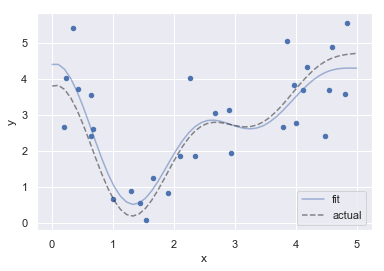

In [7]:
ax = df.plot('x', 'y', kind='scatter')
ax.plot(xpred, ypred, alpha=0.5, label='fit')
ax.plot(xpred, yactual, 'k--', alpha=0.5, label='actual')
ax.legend()

Check for uncorrelated errors

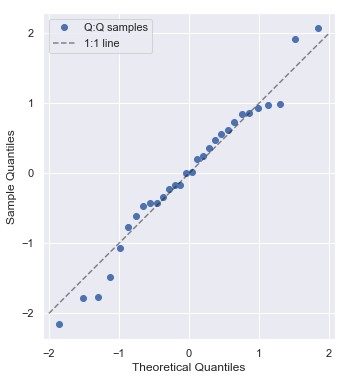

In [8]:
fig = sm.qqplot(pred(results.params, df.x) - df.y, 
          fit=True, color=colors[0], label='Q:Q samples')
ax = plt.gca()
ax.plot((-2, 2), (-2, 2), 'k--', alpha=0.5, label='1:1 line')
ax.set_aspect(1)
ax.legend()
fig.set_size_inches(6, 6)

In [9]:
seaborn.__version__

'0.9.0'